In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from pathlib import Path
import pandas as pd
from functions import *
import numpy as np
from functions import apply_filters

In [2]:
output_folder = Path.cwd()/"output_plots"

# Import and read the dataframe from cn04 

In [3]:
cwd = Path.cwd()
filename = cwd / "/Users/alexisheitzmann/Documents/CHEOPS/Code/SAA_monitoring_MC/CheopsCosmics/data_2023_01_01_to_2023_12_30.pkl"
data_file = Path(filename)

all_data = pd.read_pickle(data_file)

add percent/sec

In [4]:
all_data['percentage_cosmics_per_s'] = all_data['percentage_cosmics']/all_data['exp_time']

# Detections

In [5]:
if len(np.unique(all_data['im_height'])) > 1:
    diff_image_types = True # We have different image sizes in all_data
    print(f"Sizes available are {np.unique(all_data['im_height'])}")
else:
    diff_image_types = False

## Filter images

In [6]:
# DETECTIONS 
detections = all_data[all_data['nb_cosmics'] != 0]
#detections = all_data[(all_data['density_cosmics'] < 60) & (all_data['density_cosmics'] > 40)]
non_detections = all_data[all_data['nb_cosmics'] == 0]

max_cosmics = np.max(detections['nb_cosmics'])
max_density = np.max(detections['density_cosmics'])

print(f'Frame with most cosmics has {max_cosmics} cosmics. largest density is {int(max_density)} hits/cm2/sec')
print(f"{int(len(detections)/len(all_data)*100)}% of visits ({len(detections)}/{len(all_data)}) have detections. {int(len(non_detections))} non detections\n")

# separate different images sizes
if diff_image_types:
    size_to_keep = 200
    detections_plot = detections[detections['im_height'] == size_to_keep]
    non_detections_plot = non_detections[non_detections['im_height'] == size_to_keep]
    print(f"!! Only images of sizes {size_to_keep}*{size_to_keep} are shown !!\n")
else:     
    detections_plot = detections
    non_detections_plot = non_detections
    
## Add other filters 
# Available filters ['latitude-','latitude+','visit','density_cosmics','nb_cosmics','no_straylight','largest_cosmics', 'percentage_cosmics']
filters = ['percentage_cosmics_per_s','no_straylight']#,'percentage_cosmics']#,'largest_cosmics']#,'percentage_cosmics','percentage_cosmics']
values = [1,0]#,0.3]#,1000]
reverse_filters = [True,False]#, False]

print("DETECTIONS:")
detections_plot = apply_filters(detections_plot,filters,values,reverse_filters)
print("")
print("NON DETECTIONS:")
non_detections_plot = apply_filters(non_detections_plot,filters,values,reverse_filters)
print("")
print("ALL DATA:")
all_data_filtered = apply_filters(all_data,filters,values,reverse_filters)

Frame with most cosmics has 672 cosmics. largest density is 633 hits/cm2/sec
61% of visits (212771/343769) have detections. 130998 non detections

DETECTIONS:
Keep data images with > 1% of pixels affected by cosmics
Removed 212540 data points, kept 231
Keep data only not affected with straylight
Removed 50 data points, kept 181

NON DETECTIONS:
Keep data images with > 1% of pixels affected by cosmics
Removed 130998 data points, kept 0
Keep data only not affected with straylight
Removed 0 data points, kept 0

ALL DATA:
Keep data images with > 1% of pixels affected by cosmics
Removed 343538 data points, kept 231
Keep data only not affected with straylight
Removed 50 data points, kept 181


# Plot detections and non-detections

/var/folders/tg/c2m3vm_13yx7b6pz95h0lq1c0000gn/T/ipykernel_40957/1934246971.py:19: RuntimeWarning: divide by zero encountered in log
  data_to_plot4 = np.log(reshape_flatten_images('raw_images', data))


interactive(children=(FloatSlider(value=0.0, description='idx', max=4.0, step=1.0), Output()), _dom_classes=('…

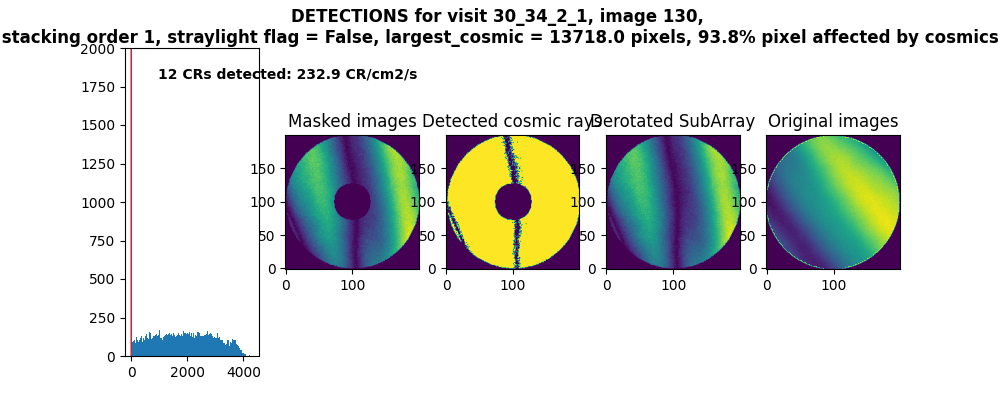

In [24]:
detection = True # If False --> non_detections

if detection:
    str_title = 'DETECTIONS'
    data = detections_plot
elif ~detection:
    str_title = 'NON DETECTIONS'
    data = non_detections_plot
else:
    str_title = 'ALL DATA'


data = all_data_filtered  


data_to_plot1 = reshape_flatten_images('masked_images', data) 
data_to_plot2 = reshape_flatten_images('binary_images', data) 
data_to_plot3 = reshape_flatten_images('derotated_images', data) 
data_to_plot4 = np.log(reshape_flatten_images('raw_images', data))
visit_id = data['visit_ID'].values
stacking_order = data['n_exp'].values
image_counter = data['img_counter'].values
threshold_cosmics = data['threshold_cosmics'].values
cosmics = data['nb_cosmics'].values
density_cosmics = data['density_cosmics'].values
straylight_boolean = data['straylight_boolean'].values
largest_cosmics = data['largest_cosmics'].values
percentage_cosmics = data['percentage_cosmics'].values

def plotimg(idx):
    
    # Update histogram
    ax[0].clear()
    ax[0].hist(data_to_plot1[int(idx)].flatten(), bins = 255)#int(np.max(data_to_plot1[int(idx)].flatten())))
    #ax[0].set_xlim(0,100)
    ax[0].set_ylim(0,2000)
    # Update image
    img1.set_data(data_to_plot1[int(idx)])
    img2.set_data(data_to_plot2[int(idx)])
    img3.set_data(data_to_plot3[int(idx)])
    ax[1].imshow(data_to_plot1[int(idx)], origin='lower', cmap = 'viridis')
    ax[2].imshow(data_to_plot2[int(idx)], origin='lower', cmap = 'viridis')
    ax[3].imshow(data_to_plot3[int(idx)], origin='lower', cmap = 'viridis')
    ax[4].imshow(data_to_plot4[int(idx)], origin='lower', cmap = 'viridis')
    ax[0].axvline(threshold_cosmics[int(idx)], c = 'r',  alpha = 0.5) # median pixel value
    ax[0].text(0.25,0.9,f'{int(cosmics[int(idx)])} CRs detected: {np.round(density_cosmics[int(idx)],1)} CR/cm2/s', weight = 'bold', transform=ax[0].transAxes)
    fig.suptitle(f'DETECTIONS for visit {visit_id[int(idx)]}, image {image_counter[int(idx)]}, \n stacking order {stacking_order[int(idx)]}, straylight flag = {straylight_boolean[int(idx)]}, largest_cosmic = {largest_cosmics[int(idx)]} pixels, {np.round(percentage_cosmics[int(idx)],1)}% pixel affected by cosmics ', weight = 'bold')
    #plt.colorbar(im)
    fig.canvas.draw_idle()
    
fig, ax = plt.subplots(ncols = 5, figsize=(10,4))
img1 = ax[1].imshow(data_to_plot1[0], origin='lower')
ax[1].set_title('Masked images')
img2 = ax[2].imshow(data_to_plot2[0], origin='lower')
ax[2].set_title('Detected cosmic rays')
img3 = ax[3].imshow(data_to_plot3[0], origin='lower')
ax[3].set_title('Derotated SubArray')
# colorbar = plt.colorbar(img)
img4 = ax[4].imshow(np.exp(data_to_plot4[0]), origin='lower')
ax[4].set_title('Original images')

ax[0].set_xlabel('Brightness')
ax[0].set_ylabel('Nb of pixels')

fig.suptitle(f"DETECTIONS for visit {visit_id[0]}, image {image_counter[0]}, \n stacking order {stacking_order[0]}", weight = 'bold')
ipywidgets.interact(plotimg, idx = ipywidgets.FloatSlider(value=0,min=0,max=np.shape(data_to_plot1)[0]-1,step=1))
plt.show()